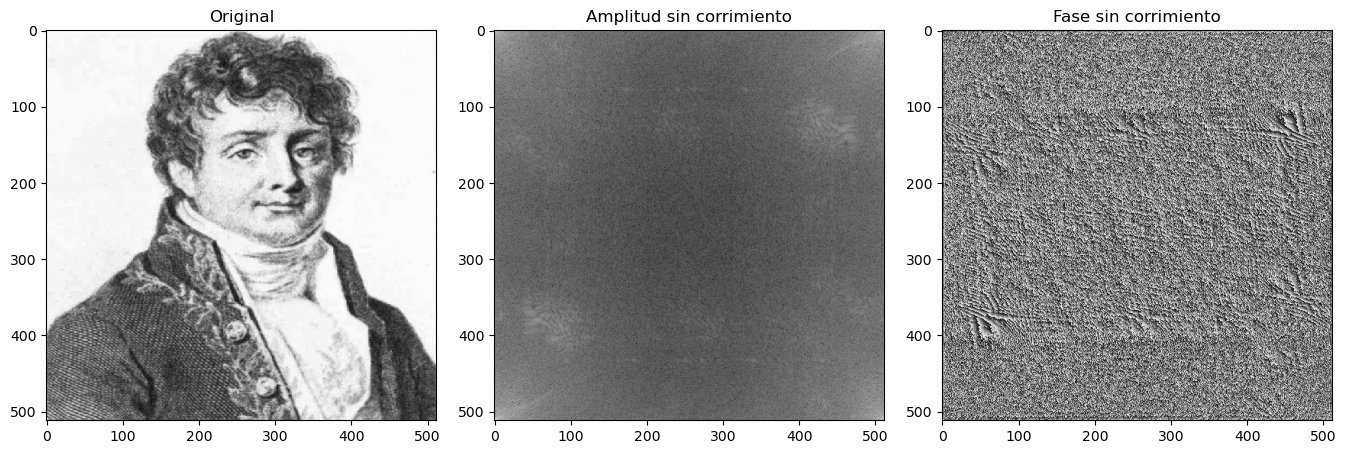

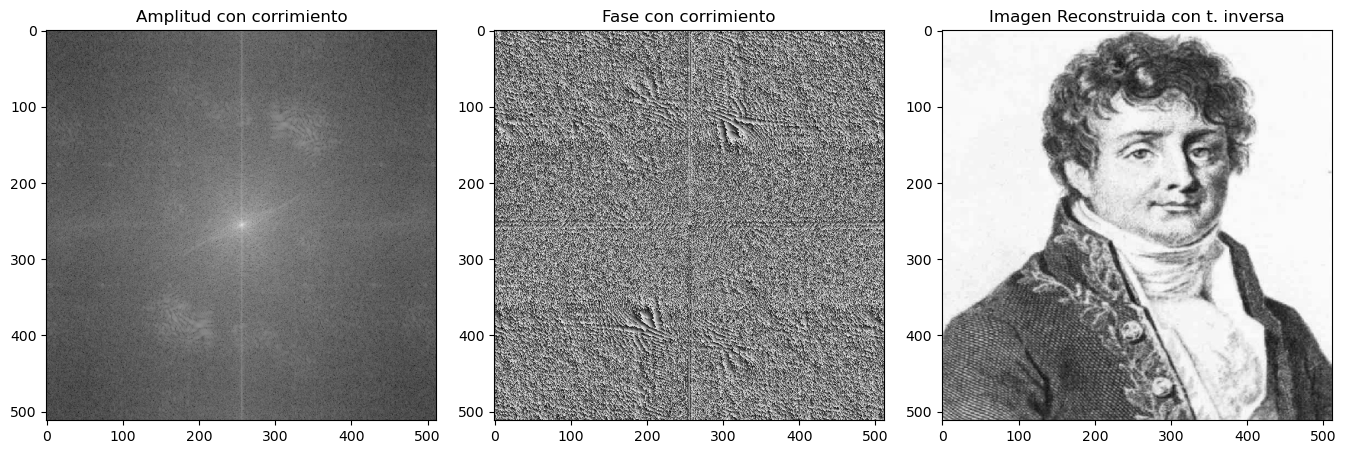

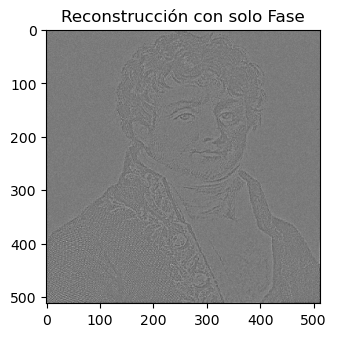

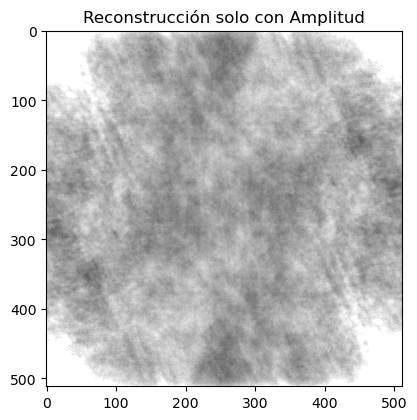

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = plt.imread('./imagenes/fourier_bw512.bmp')

# Calcular la Transformada de Fourier
tf = np.fft.fft2(imagen)

# Ej 1
# Obtener la amplitud y la fase sin corrimiento
amplitud_sin_corrimiento = np.abs(tf)
fase_sin_corrimiento = np.angle(tf)

# Obtener el centro de la imagen
filas, columnas = imagen.shape
centro_filas, centro_columnas = filas // 2, columnas // 2

# Desplazar la amplitud y la fase al centro
amplitud_centro = np.fft.fftshift(amplitud_sin_corrimiento)
fase_centro = np.fft.fftshift(fase_sin_corrimiento)

# Calcular la transformada inversa completa para obtener la imagen original
imagen_reconstruida = np.fft.ifft2(tf).real

fase_original = fase_sin_corrimiento  # Usar la fase original de la imagen

# Creamos la imagen con fase original y amplitud constante
fase_solo = 1 * np.exp(1j * fase_original)

# Calcular la transformada inversa solo con fase para obtener la imagen reconstruida
imagen_reconstruida_fase_solo = np.fft.ifft2(fase_solo).real

# Crear con fase cero y la misma amplitud
fase_cero = np.zeros_like(fase_sin_corrimiento)
fase_cero = amplitud_sin_corrimiento * np.exp(1j * fase_cero)

# Calcular la transformada inversa solo con fase cero para obtener la imagen reconstruida
imagen_reconstruida_amplitud_solo = np.fft.ifft2(fase_cero).real

# Mostrar las imágenes

# Original y Amplitud sin corrimiento y fase sin corrimiento
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + amplitud_sin_corrimiento), cmap='gray')
plt.title('Amplitud sin corrimiento')

plt.subplot(1, 4, 3)
plt.imshow(fase_sin_corrimiento, cmap='gray')
plt.title('Fase sin corrimiento')
plt.tight_layout()

# Amplitud con corrimiento y fase con corrimiento
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(np.log1p(amplitud_centro), cmap='gray')
plt.title('Amplitud con corrimiento')

plt.subplot(1, 4, 2)
plt.imshow(fase_centro, cmap='gray')
plt.title('Fase con corrimiento')

# Imagen reconstruida con transformada inversa completa
plt.subplot(1, 4, 3)
plt.imshow(imagen_reconstruida, cmap='gray')
plt.title('Imagen Reconstruida con t. inversa')
plt.tight_layout()

# Imagen reconstruida con transformada inversa solo con fase
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(imagen_reconstruida_fase_solo, cmap='gray')
plt.title('Reconstrucción con solo Fase')

# Imagen reconstruida con transformada inversa solo con amplitud
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 2)
plt.imshow(imagen_reconstruida_amplitud_solo, cmap='gray', vmin=0, vmax=255)
plt.title('Reconstrucción solo con Amplitud')
plt.tight_layout()
plt.show()


In [2]:
#Funcion que grega ruido a una imagen tomada de https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/
import random 

def add_noise(img): 

	# Getting the dimensions of the image 
	row , col = img.shape 
	
	# Randomly pick some pixels in the 
	# image for coloring them white 
	# Pick a random number between 300 and 10000 
	number_of_pixels = random.randint(300, 10000) 
	for i in range(number_of_pixels): 
		
		# Pick a random y coordinate 
		y_coord=random.randint(0, row - 1) 
		
		# Pick a random x coordinate 
		x_coord=random.randint(0, col - 1) 
		
		# Color that pixel to white 
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in 
	# the image for coloring them black 
	# Pick a random number between 300 and 10000 
	number_of_pixels = random.randint(300 , 10000) 
	for i in range(number_of_pixels): 
		
		# Pick a random y coordinate 
		y_coord=random.randint(0, row - 1) 
		
		# Pick a random x coordinate 
		x_coord=random.randint(0, col - 1) 
		
		# Color that pixel to black 
		img[y_coord][x_coord] = 0
		
	return img 


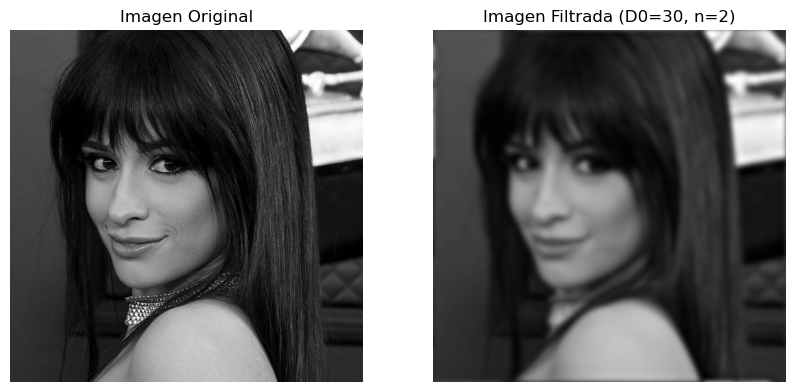

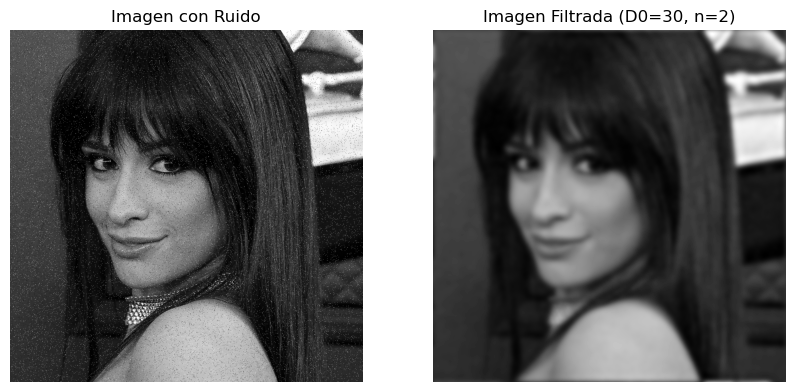

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def filtro_butterworth(img, D0, n): #paso bajo
    c, r = img.shape
    u = np.arange(r)
    v = np.arange(c)
    u, v = np.meshgrid(u, v)  # Devuelve una matriz mezclada de u y v
    forma = np.sqrt((u - (r / 2)) ** 2 + (v - (c / 2)) ** 2)
    d = (1.0 + (forma / D0) ** (2 * n))
    filtro = 1.0 / d #Paso bajo
    img_fft = np.fft.fftshift(np.fft.fft2(img))  # Transformada de Fourier de la imagen
    img_filtro = img_fft * filtro
    img_filtro_inversa = np.fft.ifft2(np.fft.ifftshift(img_filtro)).real  # Transformada inversa de Fourier

    return img_filtro_inversa


# Cargar la imagen sin ruido
img = plt.imread('./imagenes/camila.jpg') 
D0 = 30  # Frecuencia de corte
n = 2  # Orden del filtro


#aplicar el filtro Butterworth a la original
img_filtrada = filtro_butterworth(img, D0, n)


# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtrada, cmap='gray')
plt.title(f'Imagen Filtrada (D0={D0}, n={n})')
plt.axis('off')

plt.show()


#aplicar el filtro Butterworth a la imagen con ruido
img_filtrada_ruido = filtro_butterworth(add_noise(add_noise(img)), D0, n)


# Mostrar la imagen con ruido y la imagen filtrada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(add_noise(add_noise(img)), cmap='gray')
plt.title('Imagen con Ruido')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtrada_ruido, cmap='gray')
plt.title(f'Imagen Filtrada (D0={D0}, n={n})')
plt.axis('off')

plt.show()



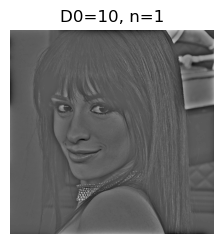

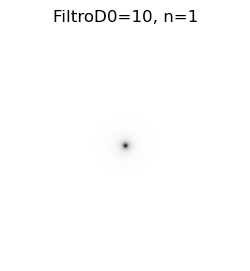

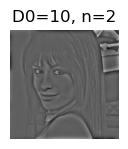

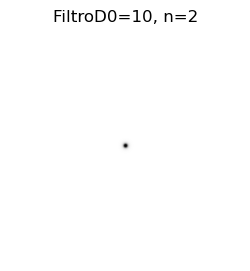

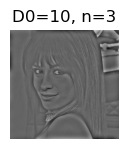

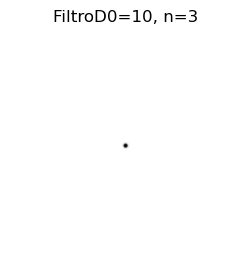

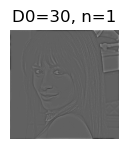

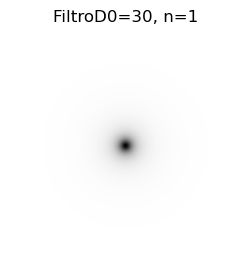

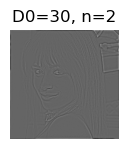

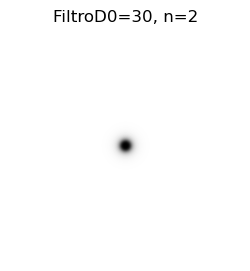

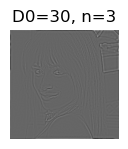

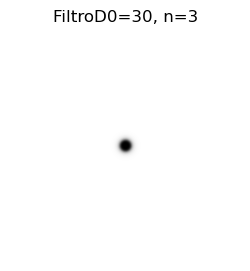

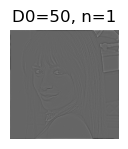

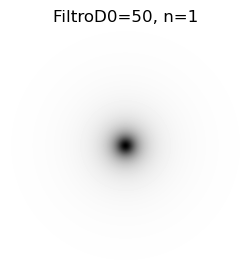

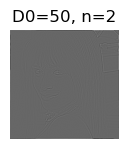

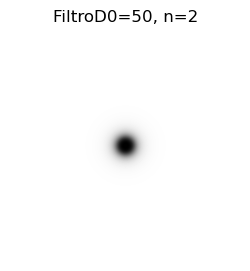

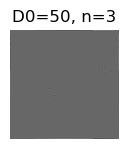

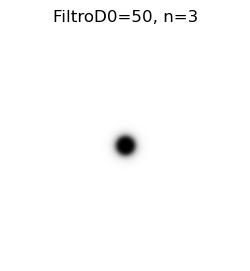

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def filtro_butterworth_paso_alto(img, D0, n):
    c, r = img.shape
    u = np.arange(r)
    v = np.arange(c)
    u, v = np.meshgrid(u, v)  # Devuelve una matriz mezclada de u y v
    forma = np.sqrt((u - (r / 2)) ** 2 + (v - (c / 2)) ** 2)
    d = (1.0 + (forma / D0) ** (2 * n))
    filtro = 1 - (1.0 / d)  # Paso alto
    img_fft = np.fft.fftshift(np.fft.fft2(img))  # Transformada de Fourier de la imagen
    img_filtro = img_fft * filtro
    img_filtro_inversa = np.fft.ifft2(np.fft.ifftshift(img_filtro)).real  # Transformada inversa de Fourier

    return img_filtro_inversa, filtro

# Cargar la imagen
img = plt.imread('./imagenes/camila.jpg') 

# Probar varios valores de frecuencia de corte D0 y órdenes n
D0_values = [10, 30, 50]  # Ajustar estos valores según sea necesario
n_values = [1, 2, 3]

# Mostrar las imágenes filtradas y los filtros para diferentes valores de D0 y n
plt.figure(figsize=(12, 9))
subplot_num = 1

for D0 in D0_values:
    for n in n_values:
        img_filtrada, filtro = filtro_butterworth_paso_alto(img, D0, n)
        plt.subplot(len(D0_values), len(n_values), subplot_num)
        plt.imshow(img_filtrada, cmap='gray')
        plt.title(f'D0={D0}, n={n}')
        plt.axis('off')
        subplot_num += 1

        # Mostrar el filtro correspondiente
        plt.figure(figsize=(3, 3))
        plt.imshow(filtro, cmap='gray')
        plt.title('Filtro' f'D0={D0}, n={n}')
        plt.axis('off')
        plt.show()


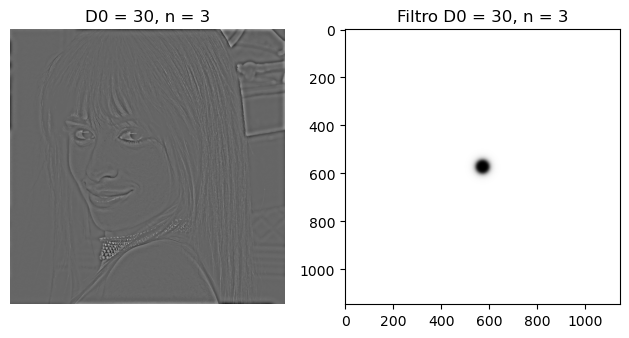

In [28]:
#Esto es un ejemplo particular con D0 = 30 y n = 3, se pueden cambiar los parametros para ver mas a detalle las cantidades deseadas

img_filtrada2, filtro2 = filtro_butterworth_paso_alto(img, 30, 3) #Se deben sustituir por los valores deseados 

plt.subplot(1,2,1)
plt.imshow(img_filtrada2, cmap='gray')
plt.title('D0 = 30, n = 3')
plt.axis('off')
subplot_num += 1

plt.subplot(1,2,2)
plt.imshow(filtro2, cmap='gray')
plt.title('Filtro D0 = 30, n = 3')

plt.tight_layout()
plt.show()
